# move

- runned before starting LAS X

In [1]:
from leicascanningtemplate import ScanningTemplate

In [2]:
p = b"C:\Users\TCS-User\AppData\Roaming\Leica Microsystems\LAS X\MatrixScreener\ScanningTemplates".decode()
f = p + b"\{ScanningTemplate}leicascanningtemplate.xml".decode()
!dir "$f"

 Volume in drive C is Windows
 Volume Serial Number is 620C-DB4F

 Directory of C:\Users\TCS-User\AppData\Roaming\Leica Microsystems\LAS X\MatrixScreener\ScanningTemplates

03/10/2015  07:33 PM           154,718 {ScanningTemplate}leicascanningtemplate.xml
               1 File(s)        154,718 bytes
               0 Dir(s)  82,355,863,552 bytes free


In [3]:
tmpl = ScanningTemplate(f)

In [4]:
pos = (1,2)
tmpl.well(*pos).attrib['FieldXStartCoordinate'], tmpl.well(*pos).attrib['FieldYStartCoordinate'],

('0.0301', '0.030199999999999998')

In [5]:
move = pos + (302e-4, 302e-4)
tmpl.move_well(*move)

In [6]:
tmpl.well(*pos).attrib['FieldXStartCoordinate'], tmpl.well(*pos).attrib['FieldYStartCoordinate']

('0.0302', '0.0302')

In [7]:
field = tmpl.field(1,2,1,1)
field.FieldXCoordinate, field.FieldYCoordinate

(0.0302, 0.0302)

In [9]:
field.attrib

{'AFSliceCount': '0', 'IsPumpScanField': 'false', 'SlideNo': '0', 'WellY': '2', 'Indicator': 'IsStandardScanField', 'Enabled': 'true', 'DriftSliceCount': '0', 'JobAssigned': 'true', 'Shape': 'IsRectangle', 'AFJobId': '0', 'IsTrackingField': 'false', 'IsMosaicCalibrationField': 'false', 'IsAutofocusScanField': 'false', 'PumpTime': '1000', 'IsDriftCompensationField': 'false', 'AFScanRange': '0', 'LabelX': 'A', 'WellX': '1', 'FieldY': '1', 'JobName': 'Job 2', 'JobId': '14', 'AFScore': '0', 'PumpDelay': '1000', 'DriftScanRange': '0', 'LabelY': '2', 'State': 'IsActive', 'Selected': 'false', 'Description': 'MatrixScreener', 'FieldX': '1', 'IsIndividualAutofocusScanField': 'false'}

In [8]:
tmpl.write()

## result
- no change
- start at 30.100

In [8]:
tmpl = ScanningTemplate(f)

In [9]:
tmpl.well(1,1).attrib['FieldXStartCoordinate']

'0.0331'

In [10]:
tmpl.field(1,1,1,1).FieldXCoordinate

0.0331

## saved in GUI

In [11]:
tmpl = ScanningTemplate(f)

In [12]:
tmpl.well(1,1).attrib['FieldXStartCoordinate']

'0.0301'

In [13]:
tmpl.field(1,1,1,1).FieldXCoordinate

0.0301

# copy -> move well -> load from file menu

In [19]:
f = p + b"\{ScanningTemplate}copied.xml".decode()
tmpl = ScanningTemplate(f)
print(tmpl.well(*pos).attrib['FieldXStartCoordinate'], tmpl.well_fields(*pos)[0].FieldXCoordinate)

tmpl.move_well(*move)

tmpl.well(*pos).attrib['FieldXStartCoordinate'], tmpl.well_fields(*pos)[0].FieldXCoordinate

0.0331 0.0331


('0.0331', 0.0331)

In [20]:
tmpl.write()

# move -> WellXOffset (commented out moving of fields)

In [14]:
from leicascanningtemplate import ScanningTemplate
p = b"C:\Users\TCS-User\AppData\Roaming\Leica Microsystems\LAS X\MatrixScreener\ScanningTemplates".decode()
f = p + b"\{ScanningTemplate}asdf.xml".decode()
tmpl = ScanningTemplate(f)

pos = (1,1)
move = pos + (331e-4, 331e-4)

print(tmpl.well(*pos).attrib['FieldXStartCoordinate'], tmpl.well_fields(*pos)[0].FieldXCoordinate)

tmpl.well(1,1).attrib

0.030099999237229995 0.030099999237229995


{'MosaicSingleImageWidth': '1', 'MosaicScanImageRotation': '0', 'FieldYStartCoordinate': '0.030099999237229995', 'SlideNo': '1', 'WellY': '1', 'Indicator': 'IsStandardScanWell', 'FieldXStartCoordinate': '0.030099999237229995', 'MosaicImageEndX': '0', 'FieldZCoordinate': '-2.3841880645312022E-10', 'ScanFieldDiameter': '20', 'MosaicImageEndY': '0', 'MosaicTileImageOverlapY': '0', 'MosaicImageStartX': '0', 'MosaicImageHeight': '1', 'XCountOfFields': '5', 'MosaicSingleImageHeight': '1', 'MosaicImageWidth': '1', 'MosaicTileImageOverlapX': '0', 'MosaicFlipImage': 'false', 'YCountOfFields': '5', 'MosaicImageStartY': '0', 'WellX': '1', 'WellYOffset': '0', 'WellXOffset': '100'}

In [18]:
tmpl.well(1,1).attrib['WellXOffset'] = '0.01'
tmpl.well(2,2).attrib['WellXOffset'] = '0.01'

In [19]:
tmpl.well(1,1).attrib

{'MosaicSingleImageWidth': '1', 'MosaicScanImageRotation': '0', 'FieldYStartCoordinate': '0.030099999237229995', 'SlideNo': '1', 'WellY': '1', 'Indicator': 'IsStandardScanWell', 'FieldXStartCoordinate': '0.030099999237229995', 'MosaicImageEndX': '0', 'FieldZCoordinate': '-2.3841880645312022E-10', 'ScanFieldDiameter': '20', 'MosaicImageEndY': '0', 'MosaicTileImageOverlapY': '0', 'MosaicImageStartX': '0', 'MosaicImageHeight': '1', 'XCountOfFields': '5', 'MosaicSingleImageHeight': '1', 'MosaicImageWidth': '1', 'MosaicTileImageOverlapX': '0', 'MosaicFlipImage': 'false', 'YCountOfFields': '5', 'MosaicImageStartY': '0', 'WellX': '1', 'WellYOffset': '0', 'WellXOffset': '0.01'}

In [20]:
tmpl.write()

# add single

In [4]:
tmpl.add_well(1,4,3e-2,3e-2)

In [5]:
tmpl.write()

- added
- empty greyed out

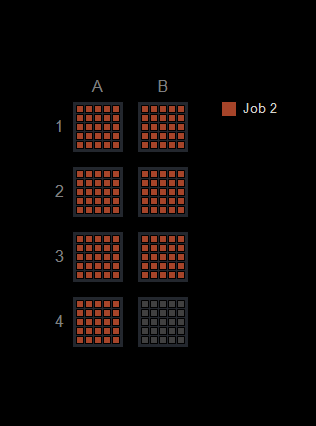

In [9]:
from IPython import display
display.Image('../Capture.PNG')

In [10]:
tmpl = ScanningTemplate(f)

In [11]:
tmpl.properties.CountOfWellsX, tmpl.properties.CountOfWellsY

(2, 4)

In [12]:
tmpl.count_of_wells

(2, 4)